<a href="https://colab.research.google.com/github/Adansote/Proyecto-4-Visualizador-de-vistas-de-p-gina-en-determinados-per-odos-de-tiempo/blob/main/Visualizador_de_vistas_de_p%C3%A1gina_en_determinados_per%C3%ADodos_de_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto 4 **

**Visualizador de vistas de página en determinados períodos de tiempo**

Para este proyecto, visualizarás los datos de las series temporales utilizando un gráfico de líneas, un gráfico de barras y un gráfico de cajas. Utilizarás Pandas, Matplotlib y Seaborn para visualizar un conjunto de datos que contiene el número de vistas diarias en la página del foro de freeCodeCamp.org del 2016-05-09 al 2019-12-03. Las visualizaciones de datos le ayudarán a entender los patrones en las visitas e identificarán el crecimiento anual y mensual.

Utiliza los datos para completar las siguientes tareas:

* Usa Pandas para importar los datos desde "fcc-forum-pageviews.csv". Establece el índice para la columna date.
* Limpiar los datos filtrando los días en que las vistas de la página se encuentran en el 2,5% superior del conjunto de datos o en el 2,5% inferior del conjunto de datos.
* Crea una función llamada draw_line_plot que utilice Matplotlib para dibujar un gráfico de línea similar a "examples/Figure_1.png". El título debe ser Daily freeCodeCamp Forum Page Views 5/2016-12/2019. La etiqueta en el eje x debe ser Date y la etiqueta en el eje y debe ser Page Views.
* Crea una función llamada draw_bar_plot que dibuje un gráfico de barras similar a "examples/Figure_2.png". Debe mostrar el número promedio de vistas diarias de cada mes, agrupadas por año.
* La leyenda debe mostrar las etiquetas de los meses y tener un título de Months. En el gráfico, la etiqueta en el eje x debe ser Years y la etiqueta en el eje y debe ser Average Page Views.
* Crea una función llamada draw_box_plot que utilice Seaborn para dibujar dos diagramas de caja adyacentes similares a "examples/Figure_3.png".
* Estos diagramas de caja deben mostrar cómo se distribuyen los valores dentro de un año o mes determinado y cómo se compara con el tiempo.
* El título del primer gráfico debe ser Year-wise Box Plot (Trend) y el título del segundo gráfico debe ser Month-wise Box Plot (Seasonality).
*  Asegúrese de que las etiquetas de los meses en la parte inferior comiencen en Jan y que los ejes x e y estén etiquetados correctamente.
* El boilerplate incluye comandos para preparar los datos.
Para cada gráfico, asegúrese de usar una copia de los datos.

El boilerplate también incluye los comandos para guardar y devolver la imagen.

**Dessarrollo**
Escribe tu código en time_series_visualizer.py. Para el desarrollo, puedes utilizar main.py para probar tu código.

**Prueba**
Las pruebas unitarias para este proyecto están en test_module.py. Hemos importado las pruebas de test_module.py a main.py para tu conveniencia.

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [56]:
# 1.- importar archivo y poner la columna date de indice
df = pd.read_csv("/content/fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")

In [57]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [58]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


**date (Fecha): La fecha en la que se registraron las vistas de la página.**

**value (Valor): El número total de vistas de la página (page views) para esa fecha.**

**2.-Limpiar los datos filtrando los días en que las vistas de la página se encuentran en el 2,5% superior del conjunto de datos o en el 2,5% inferior del conjunto de datos.**

**3.-Crea una función llamada draw_line_plot que utilice Matplotlib para dibujar un gráfico de línea similar a "examples/Figure_1.png". El título debe ser Daily freeCodeCamp Forum Page Views 5/2016-12/2019. La etiqueta en el eje x debe ser Date y la etiqueta en el eje y debe ser Page Views**

In [60]:
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"]<=df["value"].quantile(0.975))]

In [61]:

def draw_line_plot():
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(df.index, df["value"], "r", linewidth =1 )
  ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
  ax.set_xlabel("Date")
  ax.set_ylabel("Page Views")

  fig.savefig('line_plot.png')
  return fig




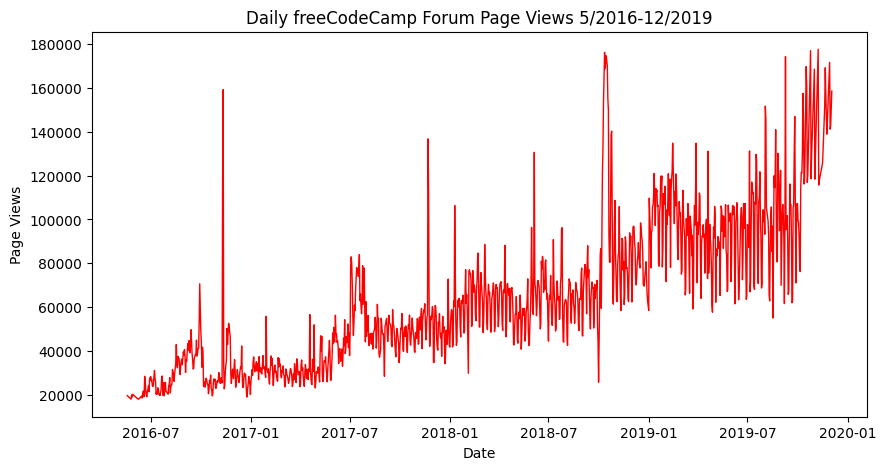

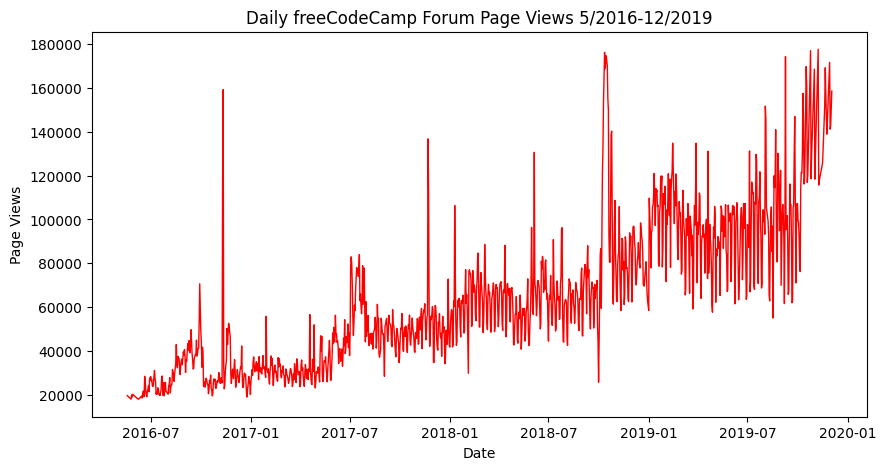

In [62]:
draw_line_plot()

** 4.-Crea una función llamada draw_bar_plot que dibuje un gráfico de barras similar a "examples/Figure_2.png". Debe mostrar el número promedio de vistas diarias de cada mes, agrupadas por año.**

**5.- La leyenda debe mostrar las etiquetas de los meses y tener un título de Months. En el gráfico, la etiqueta en el eje x debe ser Years y la etiqueta en el eje y debe ser Average Page Views.**

In [67]:
def draw_bar_plot():
  df["months"] = df.index.month
  df["years"] = df.index.year
  df_bar = df.groupby(["years", "months"])["value"].mean()
  df_bar = df_bar.unstack()
  fig = df_bar.plot.bar(legend=True, figsize=(10, 5 ),ylabel="Average Page Views", xlabel = "years").figure
  plt.legend(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November"])

  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)

  fig.savefig('bar_plot.png')
  return fig

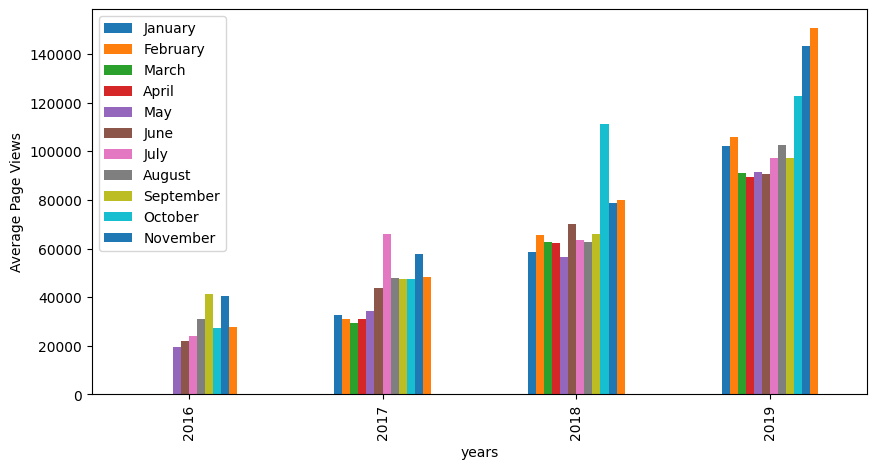

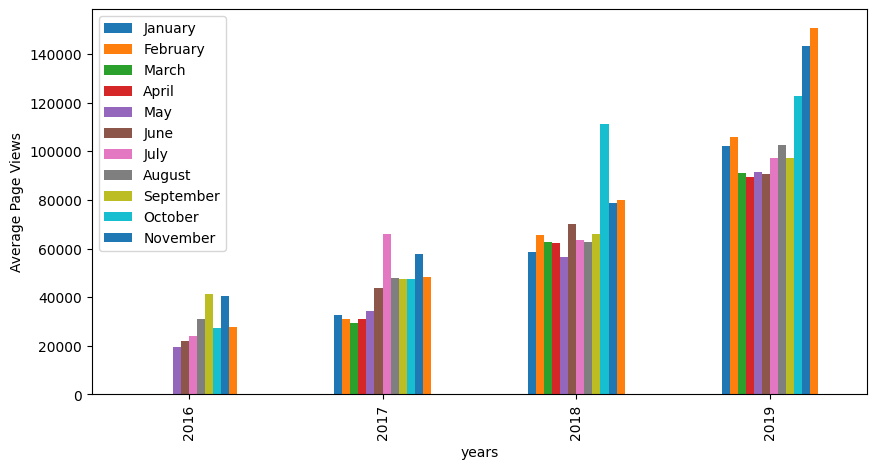

In [68]:
draw_bar_plot()

**Estos diagramas de caja deben mostrar cómo se distribuyen los valores dentro de un año o mes determinado y cómo se compara con el tiempo.**

**El título del primer gráfico debe ser Year-wise Box Plot (Trend) y el título del segundo gráfico debe ser Month-wise Box Plot (Seasonality).**

**Asegúrese de que las etiquetas de los meses en la parte inferior comiencen en Jan y que los ejes x e y estén etiquetados correctamente.**

**El boilerplate incluye comandos para preparar los datos. Para cada gráfico, asegúrese de usar una copia de los datos.**

In [75]:
from matplotlib import colors
def draw_box_plot():
  df_box = df.copy()
  df_box.reset_index(inplace=True)
  df_box["year"] = [d.year for d in df_box.date]
  df_box["month"] = [d.strftime("%b") for d in df_box.date]

  df_box["month_num"] = df_box["date"].dt.month
  df_box = df_box.sort_values("month_num")

  fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(10,5))

  axes[0] = sns.boxplot(x=df_box["year"], y=df_box["value"], ax = axes[0])
  axes[1] = sns.boxplot(x=df_box["month"], y=df_box["value"], ax= axes[1])

  axes[0].set_title("Year-wise Box Plot (Trend)")
  axes[0].set_xlabel("Year")
  axes[0].set_ylabel("Page Views")

  axes[1].set_title("Month-wise Box Plot (Seasonality)")
  axes[1].set_xlabel("Month")
  axes[1].set_ylabel("Page Views")

  fig.savefig('box_plot.png')
  return fig

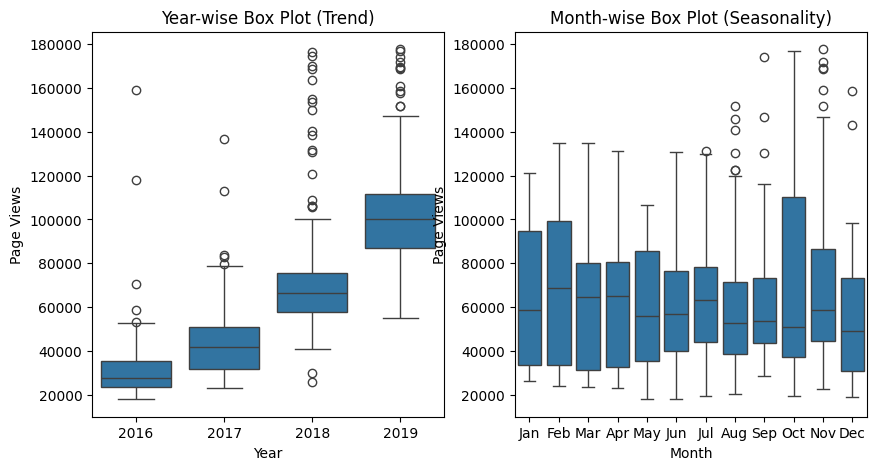

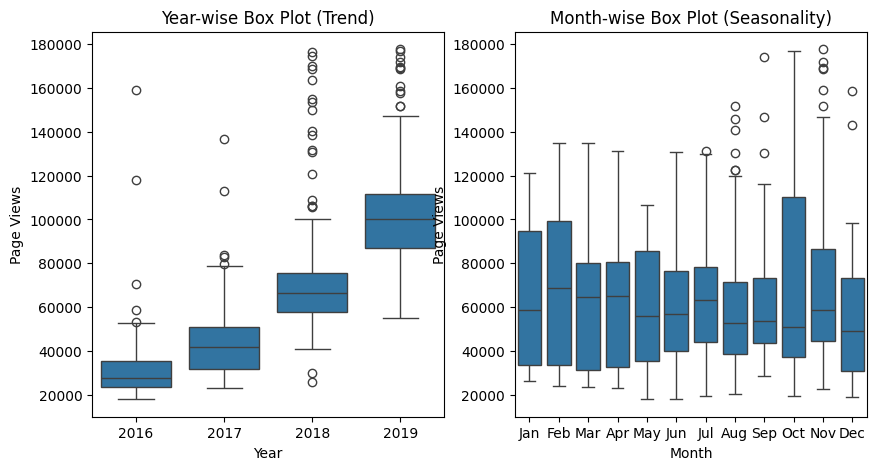

In [76]:
draw_box_plot()